In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Frequency response of a box filter

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Frequency response:

$$G(\omega) = \frac{1}{L} \cdot \frac{1 - e^{- \mathsf{i} \omega L}}{1 - e^{- \mathsf{i} \omega}}$$

## Computation using complex numbers

In [3]:
def G(omega, l):
    return np.abs(1./l * (1 - e**(-1j * omega * l)) / (1 - e**(-1j * omega))) if omega != 0 else 1
G = np.vectorize(G, otypes=[np.double])

In [4]:
L = (4, 8, 16, 32)
omega = np.linspace(0, pi, 161)

In [5]:
out = list()
legend = list()
for l in L:        
    out.append(G(omega, l))
    legend.append('L = {0}'.format(l))

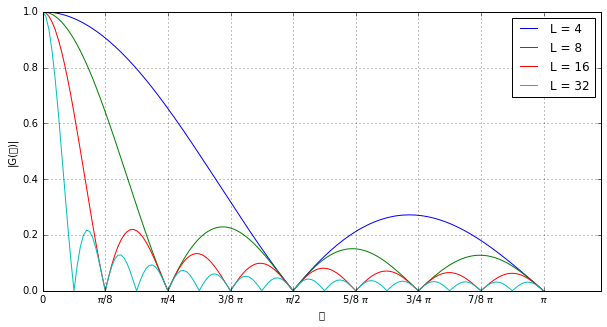

In [6]:
plt.figure(figsize(10,5))
for i in range(len(out)):
    plt.plot(omega, out[i])
plt.grid()
plt.xlabel(u'ω')
plt.ylabel(u'|G(ω)|')
labels = ['0', u'π/8', u'π/4', u'3/8 π', u'π/2', u'5/8 π', u'3/4 π', u'7/8 π', u'π']
plt.xticks(np.arange(0, pi+.001, pi/8), labels)
plt.legend(legend, loc='upper right');

## Computation without complex numbers

$$\begin{eqnarray*}
  \frac{1}{L} \left| \frac{1 - e^{- \mathsf{i} \omega L}}{1 - e^{- \mathsf{i} \omega}} \right|
  &=& \frac{1}{L} \left| \frac{1 - \big(\cos(-\omega L) + \mathsf{i} \sin(-\omega L)\big)}{1 - \big(\cos(-\omega) + \mathsf{i} \sin(-\omega)\big)} \right| \\
  &=& \frac{1}{L} \left| \frac{\big(1 - \cos(\omega L)\big) + \mathsf{i} \sin(\omega L)}{\big(1 - \cos(\omega)\big) + \mathsf{i} \sin(\omega)} \right|
   = \frac{1}{L} \left| \frac{a + \mathsf{i}b}{c + \mathsf{i}d} \right| \\
  &=& \frac{1}{L} \left| \frac{ac + bd}{c^2 + d^2} + \mathsf{i} \frac{bc - ad}{c^2 + d^2} \right| \\
  &=& \frac{1}{\underbrace{L (c^2 + d^2)}_n} \Big| \underbrace{(ac + bd)}_f + \mathsf{i} \underbrace{(bc - ad)}_g \Big| \\
  &=& \frac{1}{n} \sqrt{f^2 + g^2} \\
\end{eqnarray*}$$

In [7]:
def G2(omega, l):
    a = 1 - cos(l * omega)
    b = sin(l * omega)
    c = 1 - cos(omega)
    d = sin(omega)
    f = (a * c + b * d)
    g = (b * c - a * d)
    n = l * (c**2 + d**2)
    return np.sqrt(f**2 + g**2) / n if n != 0 else 1
G2 = np.vectorize(G2, otypes=[np.double])

In [8]:
out2 = list()
for l in L:
    out2.append(G2(omega, l))

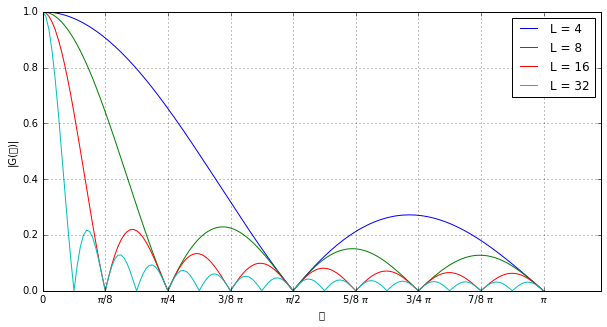

In [9]:
plt.figure(figsize(10,5))
for i in range(len(out2)):
    plt.plot(omega, out2[i])
plt.grid()
plt.xlabel(u'ω')
plt.ylabel(u'|G(ω)|')
labels = ['0', u'π/8', u'π/4', u'3/8 π', u'π/2', u'5/8 π', u'3/4 π', u'7/8 π', u'π']
plt.xticks(np.arange(0, pi+.001, pi/8), labels)
plt.legend(legend, loc='upper right');